 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Correlation.ipynb#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-0.1">Correlation Analysis</a></span></li><li><span><a href="http://localhost:8888/notebooks/Correlation.ipynb#Predict-Depression-with-Logistic-Regression" data-toc-modified-id="Predict-Depression-with-Logistic-Regression-0.2">Predict Depression with Logistic Regression</a></span></li><li><span><a href="http://localhost:8888/notebooks/Correlation.ipynb#Plots-for-Accuracy" data-toc-modified-id="Plots-for-Accuracy-0.3">Plots for Accuracy</a></span></li><li><span><a href="http://localhost:8888/notebooks/Correlation.ipynb#Other-models" data-toc-modified-id="Other-models-0.4">Other models</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Correlation.ipynb#Logistic-Regression" data-toc-modified-id="Logistic-Regression-0.4.1">Logistic Regression</a></span></li><li><span><a href="http://localhost:8888/notebooks/Correlation.ipynb#SVC" data-toc-modified-id="SVC-0.4.2">SVC</a></span></li><li><span><a href="http://localhost:8888/notebooks/Correlation.ipynb#K-Neighbours" data-toc-modified-id="K-Neighbours-0.4.3">K-Neighbours</a></span></li><li><span><a href="http://localhost:8888/notebooks/Correlation.ipynb#Perceptron" data-toc-modified-id="Perceptron-0.4.4">Perceptron</a></span></li><li><span><a href="http://localhost:8888/notebooks/Correlation.ipynb#Gradient-boosting" data-toc-modified-id="Gradient-boosting-0.4.5">Gradient boosting</a></span></li><li><span><a href="http://localhost:8888/notebooks/Correlation.ipynb#Random-forest" data-toc-modified-id="Random-forest-0.4.6">Random forest</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Correlation.ipynb#Conclusion-with-graphs" data-toc-modified-id="Conclusion-with-graphs-0.5">Conclusion with graphs</a></span></li></ul></ul></div>

## Correlation Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
patients = pd.read_csv('demographics_with_problems_labels_v2.csv', sep=';', encoding='utf-8')
del patients['Unnamed: 0']

In [15]:
social_history = pd.read_csv('patients_with_labels.csv', sep=';', encoding='utf-8')
del social_history['Unnamed: 0']

/Users/Romain/.virtualenvs/romainvenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
social_history.head()

,studyid,encid,soc_hx_dt_m,soc_hx_smoke_stts,soc_hx_alc_yn,soc_hx_ill_drug_yn,soc_hx_sexual_act_yn,soc_hx_bc_type,pt_birth_dt_m,pt_death_dt_m,...,dx6_cd,dx6_nm,dx7_dt_m,dx7_cd,dx7_nm,label_sex,label_ethnicity,Age,label_age,label_smoker
0,PT101071,ENC8471401,2013-11-08,FORMER SMOKER,0.0,0.0,9.0,NONE SPECIFIED,1931-03-29,2014-10-02,...,NaN,NaN,NaN,NaN,NaN,1,0,82,3,0
1,PT101071,ENC9836064,2013-12-20,FORMER SMOKER,0.0,0.0,9.0,NONE SPECIFIED,1931-03-29,2014-10-02,...,NaN,NaN,NaN,NaN,NaN,1,0,82,3,0
2,PT101071,ENC15082,2014-04-08,FORMER SMOKER,1.0,0.0,9.0,NONE SPECIFIED,1931-03-29,2014-10-02,...,NaN,NaN,NaN,NaN,NaN,1,0,82,3,0
3,PT101071,ENC17976449,2013-10-19,FORMER SMOKER,9.0,9.0,9.0,NONE SPECIFIED,1931-03-29,2014-10-02,...,NaN,NaN,NaN,NaN,NaN,1,0,82,3,0
4,PT101071,ENC11067729,2014-07-30,FORMER SMOKER,1.0,0.0,9.0,NONE SPECIFIED,1931-03-29,2014-10-02,...,NaN,NaN,NaN,NaN,NaN,1,0,83,3,0


In [2]:
data = pd.read_csv('first_appointments.csv', sep=';', encoding='utf-8')

/Users/Romain/.virtualenvs/romainvenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,studyid,soc_hx_dt_m,encid,soc_hx_smoke_stts,soc_hx_alc_yn,soc_hx_ill_drug_yn,soc_hx_sexual_act_yn,soc_hx_bc_type,dx1_dt_m,dx1_cd,...,pt_ethnicity,isSleepDisorder,isActiveSleepDisorder,isAnxiety,isActiveAnxiety,isDepression,isActiveDepression,label_ethnicity,label_sex,label_age
0,PT1,2015-06-28,ENC3011121,FORMER SMOKER,1.0,0.0,9.0,NONE SPECIFIED,2015-06-28,F32.9,...,Not Hispanic Or Latino,0.0,0.0,0.0,0.0,1.0,1.0,1,1,2
1,PT10,2014-01-24,ENC15475110,FORMER SMOKER,0.0,0.0,1.0,SURGICAL,2014-11-06,F41.1,...,Not Hispanic Or Latino,0.0,0.0,1.0,1.0,0.0,0.0,0,0,3
2,PT100,2015-11-04,ENC13863887,NEVER SMOKER,1.0,9.0,9.0,NONE SPECIFIED,2016-01-28,F41.1,...,Not Hispanic Or Latino,0.0,0.0,1.0,1.0,0.0,0.0,0,0,2
3,PT1000,2015-01-13,ENC1094855,FORMER SMOKER,0.0,0.0,1.0,NONE SPECIFIED,2001-04-04,F41.1,...,Not Hispanic Or Latino,1.0,1.0,1.0,1.0,1.0,0.0,0,1,3
4,PT1000,2015-01-13,ENC1094855,FORMER SMOKER,0.0,0.0,1.0,NONE SPECIFIED,2001-04-04,F41.1,...,Not Hispanic Or Latino,1.0,1.0,1.0,1.0,1.0,0.0,0,1,3


In [21]:
data.columns.values

array(['studyid', 'soc_hx_dt_m', 'encid', 'soc_hx_smoke_stts',
       'soc_hx_alc_yn', 'soc_hx_ill_drug_yn', 'soc_hx_sexual_act_yn',
       'soc_hx_bc_type', 'dx1_dt_m', 'dx1_cd', 'dx1_nm', 'dx2_dt_m',
       'dx2_cd', 'dx2_nm', 'dx3_dt_m', 'dx3_cd', 'dx3_nm', 'dx4_dt_m',
       'dx4_cd', 'dx4_nm', 'dx5_dt_m', 'dx5_cd', 'dx5_nm', 'dx6_dt_m',
       'dx6_cd', 'dx6_nm', 'dx7_dt_m', 'dx7_cd', 'dx7_nm', 'Age',
       'label_smoker', 'pt_birth_dt_m', 'pt_death_dt_m', 'pt_status',
       'pt_sex', 'pt_race', 'pt_ethnicity', 'isSleepDisorder',
       'isActiveSleepDisorder', 'isAnxiety', 'isActiveAnxiety',
       'isDepression', 'isActiveDepression', 'label_ethnicity',
       'label_sex', 'label_age'], dtype=object)

In [3]:
corr_data = data[['isSleepDisorder',
       'isActiveSleepDisorder', 'isAnxiety', 'isActiveAnxiety',
       'isDepression', 'isActiveDepression', 'label_ethnicity',
       'label_sex', 'label_age','label_smoker','soc_hx_alc_yn', 'soc_hx_ill_drug_yn']]

In [4]:
corr_data.head()

,isSleepDisorder,isActiveSleepDisorder,isAnxiety,isActiveAnxiety,isDepression,isActiveDepression,label_ethnicity,label_sex,label_age,label_smoker,soc_hx_alc_yn,soc_hx_ill_drug_yn
0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,2,0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0,0,3,0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0,0,2,0,1.0,9.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0,1,3,0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,0.0,0,1,3,0,0.0,0.0


In [5]:
corr_data.corr()

,isSleepDisorder,isActiveSleepDisorder,isAnxiety,isActiveAnxiety,isDepression,isActiveDepression,label_ethnicity,label_sex,label_age,label_smoker,soc_hx_alc_yn,soc_hx_ill_drug_yn
isSleepDisorder,1.000000,0.901834,0.013459,-0.010790,0.085849,0.037383,-0.016398,0.067645,-0.121241,-0.068056,-0.043023,-0.046151
isActiveSleepDisorder,0.901834,1.000000,0.003634,-0.005887,0.071688,0.044320,-0.010579,0.060774,-0.109498,-0.056256,-0.031860,-0.032506
isAnxiety,0.013459,0.003634,1.000000,0.933683,-0.462625,-0.494921,-0.019922,-0.040652,0.011419,-0.031550,-0.019579,-0.032473
isActiveAnxiety,-0.010790,-0.005887,0.933683,1.000000,-0.462651,-0.461683,-0.013229,-0.034923,0.015835,-0.026638,-0.009656,-0.021595
isDepression,0.085849,0.071688,-0.462625,-0.462651,1.000000,0.887153,-0.008062,-0.027324,-0.100249,0.010669,0.005001,0.017184
isActiveDepression,0.037383,0.044320,-0.494921,-0.461683,0.887153,1.000000,0.003647,-0.014603,-0.088213,0.016526,0.019665,0.035521
label_ethnicity,-0.016398,-0.010579,-0.019922,-0.013229,-0.008062,0.003647,1.000000,0.000888,0.094784,-0.000414,-0.001532,-0.009758
label_sex,0.067645,0.060774,-0.040652,-0.034923,-0.027324,-0.014603,0.000888,1.000000,0.032462,0.041008,0.051465,0.059489
label_age,-0.121241,-0.109498,0.011419,0.015835,-0.100249,-0.088213,0.094784,0.032462,1.000000,0.107055,0.018457,-0.065529
label_smoker,-0.068056,-0.056256,-0.031550,-0.026638,0.010669,0.016526,-0.000414,0.041008,0.107055,1.000000,0.084474,0.062326


In [8]:
corr_data['soc_hx_ill_drug_yn'].value_counts()

0.0    156667
9.0     26186
1.0      7829
Name: soc_hx_ill_drug_yn, dtype: int64

In [9]:
corr_data.isnull().sum()

isSleepDisorder             0
isActiveSleepDisorder       0
isAnxiety                   0
isActiveAnxiety             0
isDepression                0
isActiveDepression          0
label_ethnicity             0
label_sex                   0
label_age                   0
label_smoker                0
soc_hx_alc_yn            1812
soc_hx_ill_drug_yn       2112
dtype: int64

In [6]:
corr_data = corr_data.drop(corr_data[corr_data['soc_hx_ill_drug_yn'] == 9].index)
corr_data = corr_data.drop(corr_data[corr_data['soc_hx_alc_yn'] == 9].index)

In [7]:
corr_data = corr_data[np.isfinite(corr_data['soc_hx_ill_drug_yn'])]
corr_data = corr_data[np.isfinite(corr_data['soc_hx_alc_yn'])]

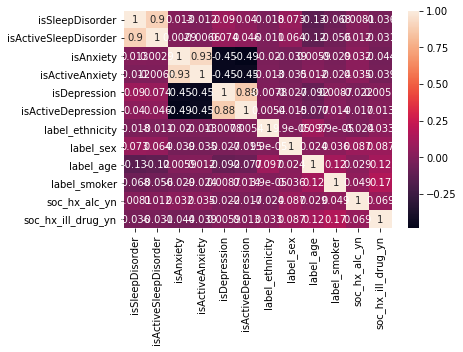

In [12]:
import seaborn as sns
%matplotlib inline
sns.heatmap(corr_data.corr(), annot=True)

## Predict Depression with Logistic Regression 

In [8]:
X = corr_data[['isSleepDisorder',
       'isActiveSleepDisorder', 'isAnxiety', 'isActiveAnxiety', 'label_ethnicity',
       'label_sex', 'label_age','label_smoker','soc_hx_alc_yn', 'soc_hx_ill_drug_yn']]
Y = corr_data['isDepression']
print('The distribution of the Heating Load classifiers : ')
print (Y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15,
                                                             random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))

The distribution of the Heating Load classifiers : 
0.0    83529
1.0    80055
Name: isDepression, dtype: int64
Number of samples in training data: 139046
Number of samples in validation data: 24538


In [9]:
from sklearn import linear_model
logreg_model = linear_model.LogisticRegression(C=1e5)
print ('Training a logistic Regression Model..')
logreg_model.fit(x_train, y_train)

Training a logistic Regression Model..


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [10]:
training_accuracy = logreg_model.score(x_train,y_train)
print ('Training Accuracy:',training_accuracy)

Training Accuracy: 0.727039972383


In [11]:
test_accuracy = logreg_model.score(x_test,y_test)
print ('Test Accuracy:',test_accuracy)

Test Accuracy: 0.723653109463


## Plots for Accuracy

In [12]:
from sklearn.utils import shuffle
data = shuffle(corr_data).reset_index(drop=True)

In [13]:
N = [0.05 , 0.10, 0.15 , 0.20, 0.25 , 0.30, 0.35]
X = data[['isSleepDisorder',
       'isActiveSleepDisorder', 'isAnxiety', 'isActiveAnxiety', 'label_ethnicity',
       'label_sex', 'label_age','label_smoker','soc_hx_alc_yn', 'soc_hx_ill_drug_yn']]
Y = data['isDepression']
training_accuracy_list = []
test_accuracy_list = []
for n in N:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= n,
                                                             random_state=100)
    logreg_model = linear_model.LogisticRegression(C=1e5)
    logreg_model.fit(x_train, y_train)
    training_accuracy = logreg_model.score(x_train,y_train)
    test_accuracy = logreg_model.score(x_test,y_test)
    training_accuracy_list.append(training_accuracy)
    test_accuracy_list.append(test_accuracy)

In [14]:
N2 = [x * len(data) for x in N]

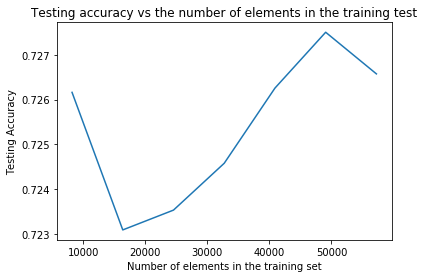

In [15]:
plt.plot(N2, test_accuracy_list)
plt.title('Testing accuracy vs the number of elements in the training test')
plt.xlabel('Number of elements in the training set')
plt.ylabel('Testing Accuracy')
plt.show()

In [16]:
X1 = data[['isSleepDisorder',
       'isActiveSleepDisorder', 'label_ethnicity',
       'label_sex', 'label_age','label_smoker','soc_hx_alc_yn', 'soc_hx_ill_drug_yn']]
Y = data['isDepression']
training_accuracy_list = []
test_accuracy_list = []
for n in N:
    x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size= n,
                                                             random_state=100)
    logreg_model = linear_model.LogisticRegression(C=1e5)
    logreg_model.fit(x_train, y_train)
    training_accuracy = logreg_model.score(x_train,y_train)
    test_accuracy = logreg_model.score(x_test,y_test)
    training_accuracy_list.append(training_accuracy)
    test_accuracy_list.append(test_accuracy)

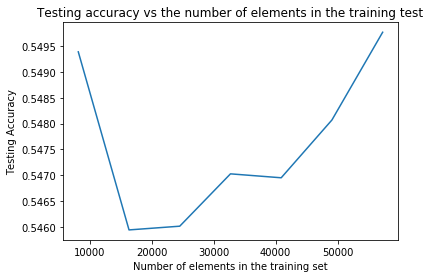

In [17]:
plt.plot(N2, test_accuracy_list)
plt.title('Testing accuracy vs the number of elements in the training test')
plt.xlabel('Number of elements in the training set')
plt.ylabel('Testing Accuracy')
plt.show()

## Other models

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

/Users/Romain/.virtualenvs/romainvenv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
data = shuffle(corr_data).reset_index(drop=True)
X = data[['isSleepDisorder',
       'isActiveSleepDisorder', 'isAnxiety', 'isActiveAnxiety', 'label_ethnicity',
       'label_sex', 'label_age','label_smoker','soc_hx_alc_yn', 'soc_hx_ill_drug_yn']]
Y = data['isDepression']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.15,
                                                             random_state=100)
acc_train = []
acc_test = []
methods = ['Logistic Regression', 'SVM','k-NN','Perceptron','XGBoost','Random Forests']

print('Number of samples in training data:',len(x_train))
print('Number of samples in validation data:',len(x_test))

Number of samples in training data: 139046
Number of samples in validation data: 24538


### Logistic Regression

In [30]:
X = corr_data[['isSleepDisorder',
       'isActiveSleepDisorder', 'isAnxiety', 'isActiveAnxiety', 'label_ethnicity',
       'label_sex', 'label_age','label_smoker','soc_hx_alc_yn', 'soc_hx_ill_drug_yn']]
Y = corr_data['isDepression']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15,
                                                             random_state=100)
logreg_model = linear_model.LogisticRegression(C=1e5)
logreg_model.fit(x_train, y_train)
training_accuracy = logreg_model.score(x_train,y_train)
test_accuracy = logreg_model.score(x_test,y_test)
acc_train.append(training_accuracy*100)
acc_test.append(test_accuracy*100)

### SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc_train = round(svc.score(x_train, y_train) * 100, 2)
acc_svc_test = round(svc.score(x_test, y_test) * 100, 2)
acc_train.append(acc_svc_train)
acc_test.append(acc_svc_test)
print('The training accuracy is :  %r ' %acc_svc_train)
print('The test accuracy is :  %r ' %acc_svc_test)

### K-Neighbours


In [31]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn_train = round(knn.score(x_train, y_train) * 100, 2)
acc_knn_test = round(knn.score(x_test, y_test) * 100, 2)
acc_train.append(acc_knn_train)
acc_test.append(acc_knn_test)
print('The training accuracy is :  %r ' %acc_knn_train)
print('The test accuracy is :  %r ' %acc_knn_test)

The training accuracy is :  68.920000000000002 
The test accuracy is :  68.049999999999997 


### Perceptron

In [32]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron_train = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron_test = round(perceptron.score(x_test, y_test) * 100, 2)
acc_train.append(acc_perceptron_train)
acc_test.append(acc_perceptron_test)
print('The training accuracy is :  %r ' %acc_perceptron_train)
print('The test accuracy is :  %r ' %acc_perceptron_test)

The training accuracy is :  69.879999999999995 
The test accuracy is :  69.629999999999995 


/Users/Romain/.virtualenvs/romainvenv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### Gradient boosting

In [33]:
gradboost = xgb.XGBClassifier(n_estimators=1000)
gradboost.fit(x_train, y_train)
y_pred = gradboost.predict(x_test)
acc_xgboost_train = round(gradboost.score(x_train, y_train) * 100, 2)
acc_xgboost_test = round(gradboost.score(x_test, y_test) * 100, 2)
acc_train.append(acc_xgboost_train)
acc_test.append(acc_xgboost_test)
print('The training accuracy is :  %r ' %acc_xgboost_train)
print('The test accuracy is :  %r ' %acc_xgboost_test)

The training accuracy is :  72.920000000000002 
The test accuracy is :  72.489999999999995 


### Random forest

In [34]:
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(x_test, y_test) * 100, 2)
acc_train.append(acc_random_forest_train)
acc_test.append(acc_random_forest_test)
print('The training accuracy is :  %r ' %acc_random_forest_train)
print('The test accuracy is :  %r ' %acc_random_forest_test)

The training accuracy is :  73.329999999999998 
The test accuracy is :  72.359999999999999 


## Conclusion with graphs

0.732685586065


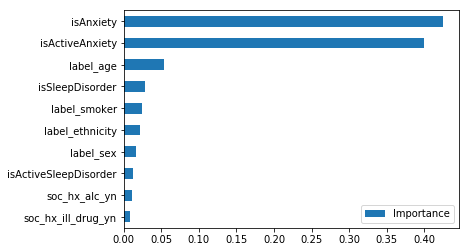

In [27]:
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame(
        model.feature_importances_  ,
        columns = [ 'Importance' ] ,
        index = X.columns
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    
plot_model_var_imp(random_forest, x_train, y_train)

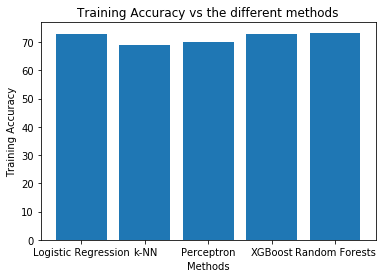

In [38]:
methods = ['Logistic Regression','k-NN','Perceptron','XGBoost','Random Forests']
n_method = [i for i in range(1,len(methods)+1)]
plt.bar(n_method, acc_train, align='center')
plt.xticks(n_method, methods)
plt.title('Training Accuracy vs the different methods')
plt.ylabel('Training Accuracy')
plt.xlabel('Methods')
plt.show()

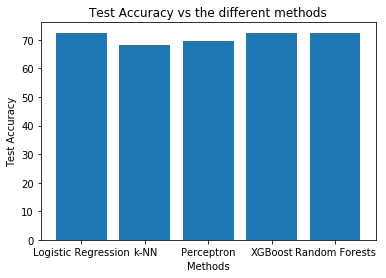

In [40]:
methods = ['Logistic Regression','k-NN','Perceptron','XGBoost','Random Forests']
n_method = [i for i in range(1,len(methods)+1)]
plt.bar(n_method, acc_test, align='center')
plt.xticks(n_method, methods)
plt.title('Test Accuracy vs the different methods')
plt.ylabel('Test Accuracy')
plt.xlabel('Methods')
plt.show()